#### Table of content
- <a href="#difference">Difference between standard deviation and standard error</a>
- <a href="#error_bar">Error bar</a>
- <a href="#confidence_intervals">Confidence intervals in regression</a>

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data

Source <a href="https://www.kaggle.com/datasets/brendan45774/test-file">here</a>.

In [2]:
data = pd.read_csv('Data/titanic.csv')
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


<h1 id="difference">Difference between standard deviation and standard error</h1>

$$
\text{A measure of the amount of variation:}
$$
$$
\text{standard deviation} = \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
$$
<br/>

$$
\text{Determines how precise the estimates are:}
$$
$$
\text{standard error} = \sigma_{\bar{x}} = \sqrt{\frac{\sigma^2}{n}} = \frac{\sigma}{\sqrt{n}}
$$

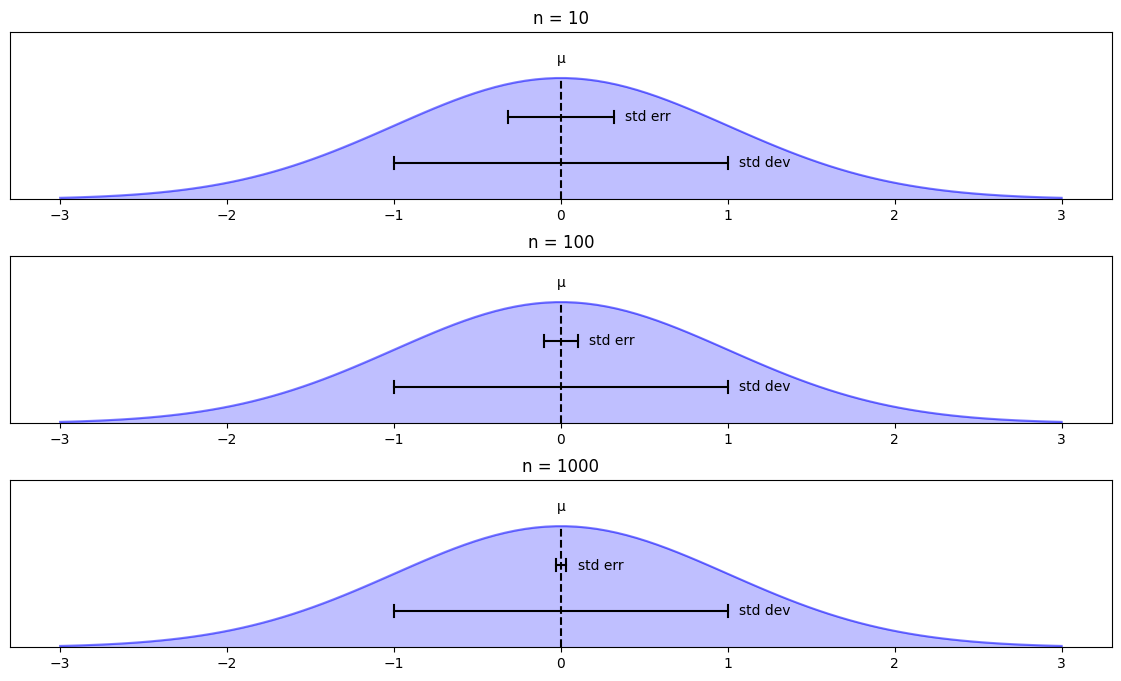

In [3]:
def normal(x, mean:float=0, std:float=1):
    return (1/(std*np.sqrt(2*np.pi)))*np.exp(-((x-mean)/std)**2/2)

fig, ax = plt.subplots(nrows=3, figsize=(12, 7))
x = np.linspace(-3, 3, 100)
y = normal(x)
plt.tight_layout(pad=2)
for i, samples in enumerate([10, 100, 1000]):
    # normal distribution
    ax[i].plot(x, y, color='blue', alpha=0.5)
    ax[i].fill_between(x, y, color='blue', alpha=0.25)
    ax[i].plot([0, 0], [0, normal(0)], color='black', linestyle='--')
    ax[i].set_ylim(0, 0.55)
    ax[i].text(0, 0.45, 'μ', horizontalalignment='center')
    ax[i].set_title(f'n = {samples}')
    ax[i].set_yticks([])

    # standard error
    stdErr = 1/np.sqrt(samples)
    ax[i].plot([-stdErr, stdErr], [0.27, 0.27], color='black')
    ax[i].plot([-stdErr, -stdErr], [0.25, 0.29], color='black')
    ax[i].plot([stdErr, stdErr], [0.25, 0.29], color='black')
    ax[i].text(stdErr+0.07, 0.27, 'std err', verticalalignment='center')

    # standard deviation
    ax[i].plot([-1, 1], [0.12, 0.12], color='black')
    ax[i].plot([-1, -1], [0.10, 0.14], color='black')
    ax[i].plot([1, 1], [0.10, 0.14], color='black')
    ax[i].text(1+0.07, 0.12, 'std dev', verticalalignment='center')

plt.show()

<h1 id="error_bar">Error bar</h1>

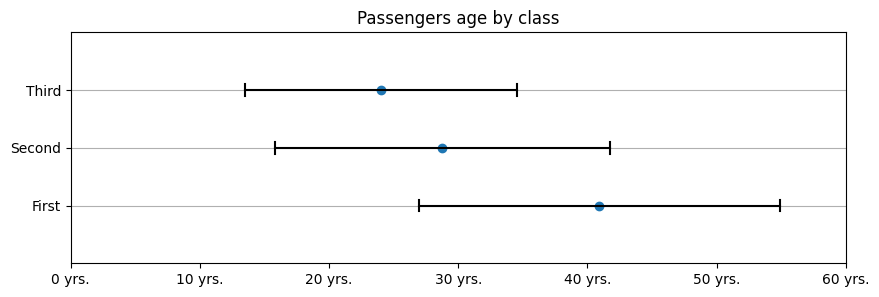

In [4]:
plt.figure(figsize=(10, 3))
plt.grid(axis='y')
subset = data.select_dtypes(include=np.number).groupby('Pclass').agg(['count', 'std', 'mean']).Age
plt.scatter(subset['mean'], np.arange(3))

for i in np.arange(1, 4):
    lowerBound = subset.loc[i, 'mean'] - subset.loc[i, 'std']
    upperBound = subset.loc[i, 'mean'] + subset.loc[i, 'std']
    plt.plot([lowerBound, upperBound], [i-1, i-1], color='black')
    plt.plot([lowerBound, lowerBound], [i-1-0.1, i-1+0.1], color='black')
    plt.plot([upperBound, upperBound], [i-1-0.1, i-1+0.1], color='black')

plt.xlim(0, 60)
plt.ylim(-1, 3)
plt.xticks(np.arange(0, 61, 10), [f"{age} yrs." for age in np.arange(0, 61, 10)])
plt.yticks(np.arange(3), ['First', 'Second', 'Third'])
plt.title('Passengers age by class')
plt.show()

<h1 id="confidence_intervals">Confidence intervals in regression</h1>

#### Data

In [7]:
curve = lambda x: x**3 + 3*x**2 + 2*x + np.random.normal(size=len(x), scale=3)

X = np.linspace(-4, 2, 100)
y = curve(x)

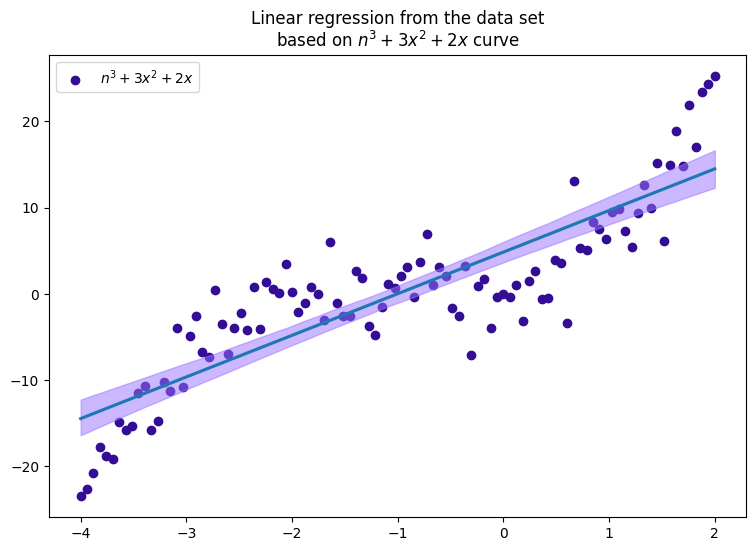

In [8]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.regplot(ax=ax, x=X, y=y, label='$n^3 + 3x^2 +2x$')
ax.set_title("Linear regression from the data set\nbased on $n^3 + 3x^2 +2x$ curve")

plt.setp(ax.collections[0], alpha=1, color='#330d94')
plt.setp(ax.collections[1], alpha=0.5, color='#9a73ff')

ax.legend()
plt.show()

# Confidence intervals in polinomial regression

Sources:<br/>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='https://towardsdatascience.com/quick-start-to-gaussian-process-regression-36d838810319'>Quick Start to Gaussian Process Regression - Medium</a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='https://juanitorduz.github.io/gaussian_process_reg/'>An Introduction to Gaussian Process Regression</a><br/>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='https://github.com/ShuaiGuo16/Hypothetical_Outcome_Plots/blob/master/Regression_Animation.ipynb'>Hypothetical Outcome Plots by Shuai Guo</a>

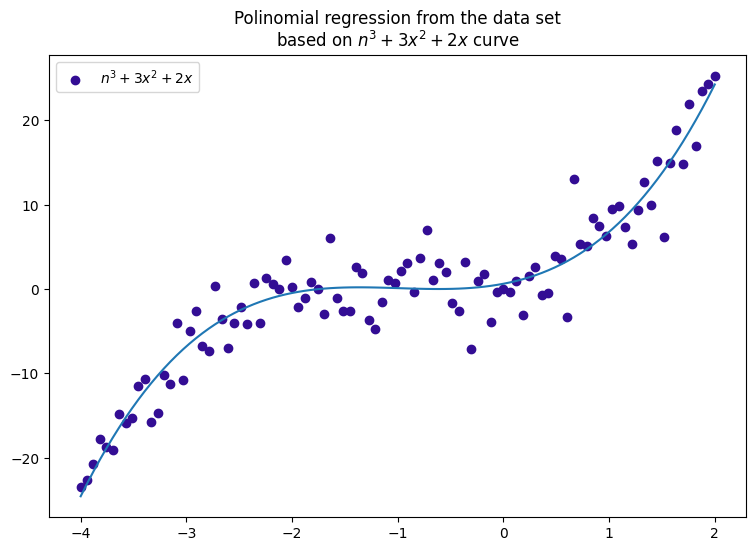

[-0.70138444 -0.09055122  5.08034917]


In [36]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# data scaling
X = X.reshape((-1, 1))
sclr = StandardScaler().fit(X)
X_scaled = sclr.transform(X)

# making polinomial
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# polynomial regression model
polyReg = LinearRegression()
polyReg.fit(X_poly, y)

plt.figure(figsize=(9, 6))
plt.scatter(X, y, color='#330d94', label='$n^3 + 3x^2 +2x$')
xPos = np.linspace(X.min(), X.max(), 100)
xPosScaled = sclr.transform(xPos.reshape(-1, 1))
xPosPoly = poly.transform(xPosScaled)
yPos = polyReg.predict(xPosPoly)
plt.plot(xPos, yPos)
plt.title("Polinomial regression from the data set\nbased on $n^3 + 3x^2 +2x$ curve")
plt.legend()
plt.show()